# **Build CNN Model for Classification of Flowers**

# **1.Download the Dataset**

In [ ]:
pwd

**Load the image Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**UN-zip the Folder**

In [ ]:
cd //content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N



In [ ]:
pwd

'/content/drive/MyDrive'

# **2.Image Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip =True,zoom_range = 0.2)


In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
x_train =train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64), class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test =test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**CNN**

# **3.Create Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

# **4.Add Layers(Convolution,Maxpooling,Flatten**

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*(3*3*3+1)

896

## **Hidden Layers**

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

## **Output Layers**

In [ ]:
model.add(Dense(5,activation='softmax'))

# **5.Compile the Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

180

In [ ]:
4317/24

179.875

# **6.Fit the Model**

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=5)


Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
180/180 [==============================] - ETA: 0s - loss: 1.2956 - accuracy: 0.4658

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
180/180 [==============================] - 1081s 6s/step - loss: 1.2956 - accuracy: 0.4658 - val_loss: 1.0785 - val_accuracy: 0.5747
Epoch 2/5
180/180 [==============================] - 68s 378ms/step - loss: 1.0660 - accuracy: 0.5701 - val_loss: 1.1259 - val_accuracy: 0.5539
Epoch 3/5
180/180 [==============================] - 64s 356ms/step - loss: 0.9723 - accuracy: 0.6173 - val_loss: 0.9317 - val_accuracy: 0.6421
Epoch 4/5
180/180 [==============================] - 68s 380ms/step - loss: 0.9126 - accuracy: 0.6414 - val_loss: 1.0109 - val_accuracy: 0.6192
Epoch 5/5
180/180 [==============================] - 64s 354ms/step - loss: 0.8906 - accurac

# **7.Save the Model**

In [ ]:
model.save('flowers.h5')

In [ ]:
ls flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


# **8.Test the Model**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
#load the model
model=load_model('flowers.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/flowers/rose/15949087094_a8f565295c_m.jpg')

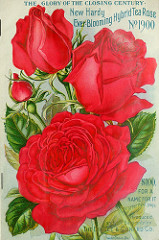

In [ ]:
img

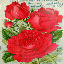

In [ ]:
img=image.load_img('/content/drive/MyDrive/flowers/rose/15949087094_a8f565295c_m.jpg',target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[212., 210., 187.],
        [210., 210., 184.],
        [218., 214., 189.],
        ...,
        [219., 215., 190.],
        [215., 211., 186.],
        [216., 212., 187.]],

       [[213., 211., 188.],
        [218., 214., 189.],
        [218., 214., 189.],
        ...,
        [221., 219., 196.],
        [216., 214., 191.],
        [217., 215., 192.]],

       [[216., 214., 191.],
        [214., 212., 189.],
        [220., 218., 195.],
        ...,
        [213., 215., 193.],
        [228., 224., 199.],
        [222., 220., 199.]],

       ...,

       [[191., 193., 169.],
        [189., 197., 174.],
        [186., 196., 169.],
        ...,
        [195., 210., 191.],
        [207., 212., 190.],
        [210., 213., 192.]],

       [[195., 199., 174.],
        [191., 196., 174.],
        [188., 201., 175.],
        ...,
        [212., 217., 197.],
        [209., 214., 194.],
        [209., 213., 196.]],

       [[193., 195., 171.],
        [195., 198., 177.],
        [185., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[212., 210., 187.],
         [210., 210., 184.],
         [218., 214., 189.],
         ...,
         [219., 215., 190.],
         [215., 211., 186.],
         [216., 212., 187.]],

        [[213., 211., 188.],
         [218., 214., 189.],
         [218., 214., 189.],
         ...,
         [221., 219., 196.],
         [216., 214., 191.],
         [217., 215., 192.]],

        [[216., 214., 191.],
         [214., 212., 189.],
         [220., 218., 195.],
         ...,
         [213., 215., 193.],
         [228., 224., 199.],
         [222., 220., 199.]],

        ...,

        [[191., 193., 169.],
         [189., 197., 174.],
         [186., 196., 169.],
         ...,
         [195., 210., 191.],
         [207., 212., 190.],
         [210., 213., 192.]],

        [[195., 199., 174.],
         [191., 196., 174.],
         [188., 201., 175.],
         ...,
         [212., 217., 197.],
         [209., 214., 194.],
         [209., 213., 196.]],

        [[193., 195., 171.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 30ms/step


array([2])

In [ ]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index=['daisy','dandelion','rose','sunflower']

In [ ]:
index[y[0]]

'rose'

In [ ]:
img=image.load_img('/content/drive/MyDrive/flowers/dandelion/10294487385_92a0676c7d_m.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['dandelion','daisy','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 30ms/step


'dandelion'

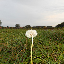

In [ ]:
img

In [ ]:
img=image.load_img('/content/drive/MyDrive/flowers/rose/12338444334_72fcc2fc58_m.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','dandelion','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 24ms/step


'rose'

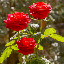

In [ ]:
img

In [ ]:
img=image.load_img('/content/drive/MyDrive/flowers/tulip/10164073235_f29931d91e.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['sunflower','daisy','dandelion','rose','tulip']
index[y[0]]

1/1 [==============================] - 0s 28ms/step


'tulip'

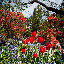

In [ ]:
img